In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

In [6]:
def tides(r,theta,a,eps):
    alpha=2.236e26
    
    numer=a**5*r*eps*(1-eps**2)*np.sin(2*theta)
    denom=(r**2-a**2*(1-eps**2)*np.cos(theta)**2)**2
    
    return(alpha*numer/denom)

def jet(r,theta,phi,a,eps):
    beta=2.306e23
    
    numer1=(1-eps**2)*np.sin(2*theta)*np.cos(phi)
    denom1=np.sqrt(np.cos(theta)**2+eps**2*np.sin(theta)**2)
    
    term2=2*np.sqrt(np.cos(theta)**2+eps**2*np.sin(theta))*np.sin(phi)
    
    return(beta*a**4*eps/(r**2)*(numer1/denom1 + term2))
    
    
def comp(r,theta,phi,a,eps):
    return(jet(r,theta,phi,a,eps)/tides(r,theta,a,eps))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


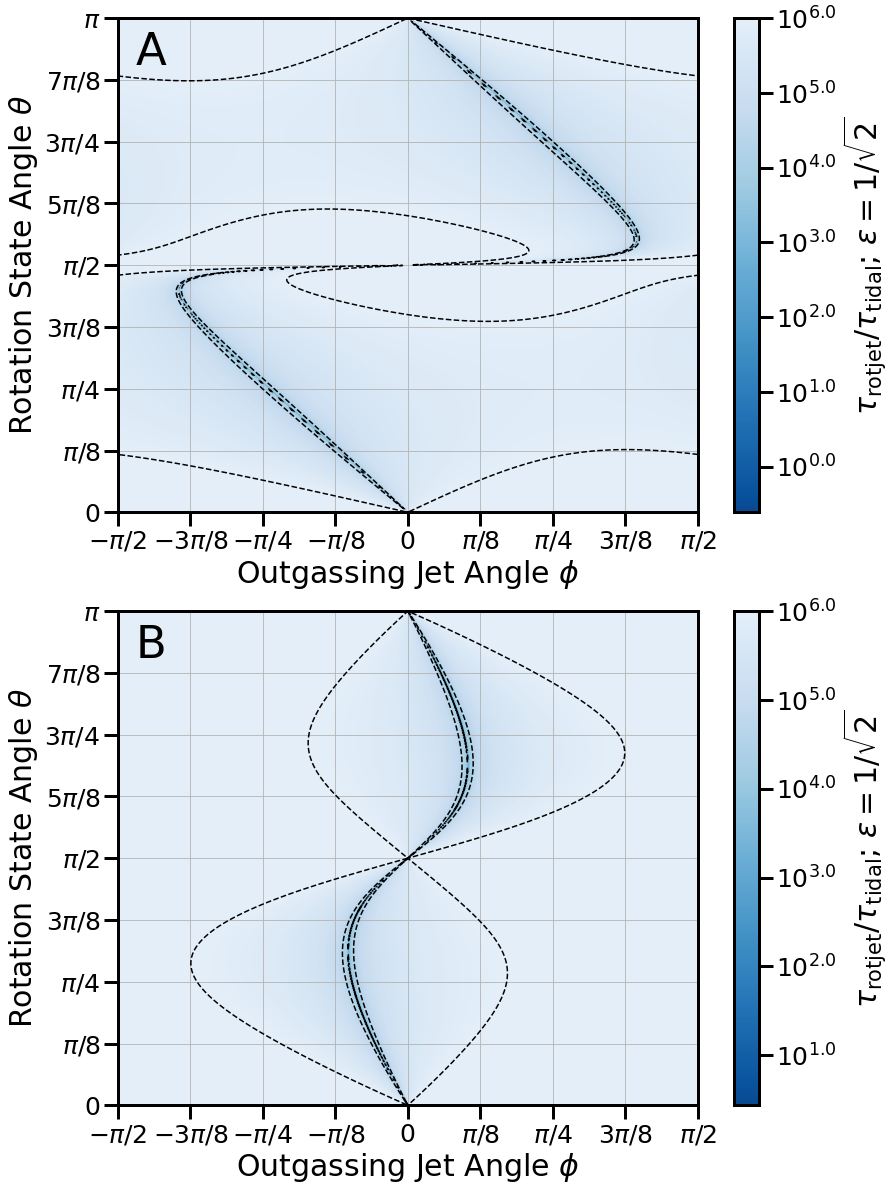

In [7]:
import matplotlib.ticker as ticker
import matplotlib.colors as colors

thetas=np.linspace(0,np.pi,1000)
phis=np.linspace(-np.pi/2,np.pi/2,1000)

THETA,PHI=np.meshgrid(thetas,phis,indexing='ij')
r=0.26*1.49e13

ratio=comp(r,THETA,PHI,11500,1/6)
ratio=np.ma.masked_invalid(np.log10(np.abs(ratio)), copy=True)

new_cmap = colors.LinearSegmentedColormap.from_list("test",plt.get_cmap('Blues_r')(np.linspace(0.1,0.9,100)))
new_cmap.set_bad('magenta')

fig, axs = plt.subplots(2,1,figsize=(13,20))
mappable1=axs[0].imshow((ratio),aspect='auto',cmap=new_cmap,extent=[-np.pi/2,np.pi/2,0,np.pi],origin='lower',vmax=6)
axs[0].set_xlabel("Outgassing Jet Angle $\\phi$",fontsize=30)
axs[0].set_ylabel("Rotation State Angle $\\theta$",fontsize=30)

axs[0].set_yticks(np.pi*np.linspace(0,1,9))
axs[0].set_yticklabels([0,"$\\pi/8$","$\\pi/4$","$3\\pi/8$","$\\pi/2$",
                   "$5\\pi/8$","$3\\pi/4$","$7\\pi/8$","$\\pi$"])

axs[0].set_xticks(np.pi*np.linspace(-1/2,1/2,9))
axs[0].set_xticklabels(["$-\\pi/2$","$-3\\pi/8$","$-\\pi/4$","$-\\pi/8$",0,
                   "$\\pi/8$","$\\pi/4$","$3\\pi/8$","$\\pi/2$"])


levels=np.linspace(np.min(ratio),6,5)
CS=axs[0].contour(PHI,THETA,ratio,origin='lower',colors='k',linestyles='dashed',levels=levels)

def fmtbar(x,pos):
    return(r'$10^{{{}}}$'.format(x))

axs[0].grid()

ratio=comp(r,THETA,PHI,11500,1/np.sqrt(2))
ratio=np.ma.masked_invalid(np.log10(np.abs(ratio)), copy=True)

mappable2=axs[1].imshow((ratio),aspect='auto',cmap=new_cmap,extent=[-np.pi/2,np.pi/2,0,np.pi],origin='lower',vmax=6)
axs[1].set_xlabel("Outgassing Jet Angle $\\phi$",fontsize=30)
axs[1].set_ylabel("Rotation State Angle $\\theta$",fontsize=30)

axs[1].set_yticks(np.pi*np.linspace(0,1,9))
axs[1].set_yticklabels([0,"$\\pi/8$","$\\pi/4$","$3\\pi/8$","$\\pi/2$",
                   "$5\\pi/8$","$3\\pi/4$","$7\\pi/8$","$\\pi$"])

axs[1].set_xticks(np.pi*np.linspace(-1/2,1/2,9))
axs[1].set_xticklabels(["$-\\pi/2$","$-3\\pi/8$","$-\\pi/4$","$-\\pi/8$",0,
                   "$\\pi/8$","$\\pi/4$","$3\\pi/8$","$\\pi/2$"])


def fmtbar(x,pos):
    return(r'$10^{{{}}}$'.format(x))

axs[1].grid()

levels=np.linspace(np.min(ratio),6,5)
CS=axs[1].contour(PHI,THETA,ratio,origin='lower',colors='k',linestyles='dashed',levels=levels)

cb=fig.colorbar(mappable=mappable1,ax=axs[0],format=ticker.FuncFormatter(fmtbar))
cb.set_label("$\\tau_{\\mathrm{rotjet}}/\\tau_{\\mathrm{tidal}}$; $\\epsilon=1/\\sqrt{2}$",fontsize=30)

cb=fig.colorbar(mappable=mappable2,ax=axs[1],format=ticker.FuncFormatter(fmtbar))
cb.set_label("$\\tau_{\\mathrm{rotjet}}/\\tau_{\\mathrm{tidal}}$; $\\epsilon=1/\\sqrt{2}$",fontsize=30)

axs[0].text(-7.5*np.pi/16,14.5*np.pi/16,"A",fontsize=45)
axs[1].text(-7.5*np.pi/16,14.5*np.pi/16,"B",fontsize=45)

plt.savefig('../Figures and Paper/rot_torque_ratio.pdf',
           bbox_inches='tight', dpi=300)